In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle
import re
from warnings import filterwarnings
filterwarnings('ignore')

# Problem Statement

###### Predict the price of an used car

# Data Gathering

In [660]:
df=pd.read_csv('train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [661]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [662]:
df.isna().mean()*100

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [663]:
df.shape

(6019, 14)

# EDA

### 1. Name

In [664]:
df['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [665]:
df['Name'].nunique()

1876

In [666]:
df['Name'].value_counts().to_dict()

{'Mahindra XUV500 W8 2WD': 49,
 'Maruti Swift VDI': 45,
 'Honda City 1.5 S MT': 34,
 'Maruti Swift Dzire VDI': 34,
 'Maruti Swift VDI BSIV': 31,
 'Maruti Ritz VDi': 30,
 'Hyundai i10 Sportz': 30,
 'Toyota Fortuner 3.0 Diesel': 29,
 'Honda Amaze S i-Dtech': 27,
 'Hyundai Grand i10 Sportz': 27,
 'Maruti Ertiga VDI': 25,
 'Honda Brio S MT': 25,
 'Honda City 1.5 V MT': 24,
 'Hyundai Verna 1.6 SX': 23,
 'Maruti Wagon R VXI': 23,
 'Maruti Wagon R LXI': 22,
 'Maruti Alto LXi': 21,
 'Hyundai EON Era Plus': 20,
 'Maruti Ertiga ZDI': 20,
 'Skoda Superb Elegance 1.8 TSI AT': 20,
 'BMW 3 Series 320d': 20,
 'Maruti Alto 800 LXI': 20,
 'Toyota Fortuner 4x2 AT': 19,
 'Hyundai i10 Magna 1.2': 19,
 'Maruti Celerio VXI AT': 19,
 'Renault KWID RXT': 18,
 'Volkswagen Vento Diesel Highline': 18,
 'Maruti Wagon R LXI CNG': 18,
 'Hyundai i20 1.2 Magna': 18,
 'Maruti Swift Dzire VXI': 18,
 'Volkswagen Polo 1.2 MPI Highline': 18,
 'Volkswagen Polo 1.5 TDI Highline': 18,
 'Ford Figo Diesel EXI': 17,
 'Audi A4 2

In [667]:
p=[]
for i,j in d.items():
    if j<=5:
        p.append(j)
len(p)

AttributeError: 'function' object has no attribute 'items'

In [668]:
def convert(b):
    a=b.value_counts().to_dict()
    l=[]
    for i,j in a.items():
        if j<=5:
            l.append(i)
    d={}
    for i in l:
        d.update({i:'other'})
    b.replace(d,inplace=True)
convert(df['Name'])
print(df['Name'].shape)
print(df['Name'].nunique())

(6019,)
265


In [669]:
df['Name'].nunique()

265

### 2.Year

In [670]:
df['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

<AxesSubplot:xlabel='Year'>

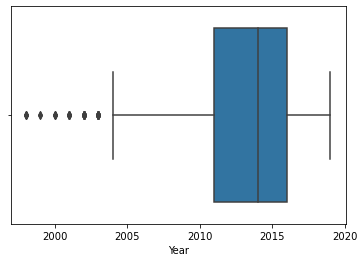

In [671]:
sns.boxplot(df['Year'])

### 3.Kilometers_Driven

In [672]:
df['Kilometers_Driven'].unique()

array([72000, 41000, 46000, ..., 45004, 70602, 27365], dtype=int64)

<AxesSubplot:xlabel='Kilometers_Driven'>

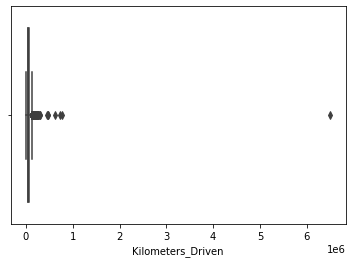

In [673]:
sns.boxplot(df['Kilometers_Driven'])

### 4.Fuel_Type

In [674]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [675]:
df['Fuel_Type'].nunique()

5

### 5.Transmission

In [676]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [677]:
df['Transmission'].value_counts().to_dict()

{'Manual': 4299, 'Automatic': 1720}

In [678]:
df['Transmission'].replace({'Manual': 0, 'Automatic': 1},inplace=True)
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,0,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,0,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,other,Chennai,2011,46000,Petrol,0,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,0,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,1,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


   ### 6.Owner_Type

In [679]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [680]:
df['Owner_Type'].value_counts().to_dict()

{'First': 4929, 'Second': 968, 'Third': 113, 'Fourth & Above': 9}

In [681]:
df['Owner_Type'].replace({'First': 3, 'Second': 2, 'Third': 1, 'Fourth & Above': 0},inplace=True)


In [682]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,0,3,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,0,3,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,other,Chennai,2011,46000,Petrol,0,3,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,0,3,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,1,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### 7.Mileage

In [683]:
df['Mileage'].nunique()

442

In [684]:
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [685]:
df['Mileage']=df['Mileage'].fillna(df['Mileage'].mode()[0])

In [686]:
df['Mileage'].isna().sum()

0

In [687]:
def clean(data):
    return data.replace('kmpl','').replace('km/kg','') 
    

In [688]:
df['Mileage']=df['Mileage'].apply(clean).astype('float')

In [689]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,0,3,26.60,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,0,3,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,other,Chennai,2011,46000,Petrol,0,3,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,0,3,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,1,2,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74


In [690]:
df['Mileage']

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 6019, dtype: float64

<AxesSubplot:xlabel='Mileage'>

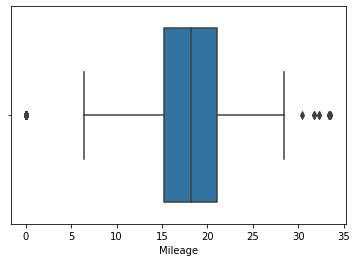

In [691]:
sns.boxplot(df['Mileage'])

### 8.Engine

In [692]:
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [693]:
df['Engine']=df['Engine'].fillna(df['Engine'].mode()[0])

In [694]:
df['Engine'].isna().sum()

0

In [695]:
def fun(data):
    return data.replace('CC','')

In [696]:
df['Engine']=df['Engine'].apply(fun).astype('int')

In [697]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,0,3,26.60,998,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,0,3,19.67,1582,126.2 bhp,5.0,NaN,12.50
2,2,other,Chennai,2011,46000,Petrol,0,3,18.20,1199,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,0,3,20.77,1248,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,1,2,15.20,1968,140.8 bhp,5.0,NaN,17.74


### 9.Power

In [698]:
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [699]:
df['Power'].isna().sum()

36

In [700]:
df['Power']=df['Power'].fillna(df['Power'].mode()[0])

In [701]:
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [702]:
def c(data):
    return data.replace('bhp','')

In [703]:
df['Power']=df['Power'].apply(c)
df['Power']

0       58.16 
1       126.2 
2        88.7 
3       88.76 
4       140.8 
         ...  
6014       74 
6015       71 
6016      112 
6017     67.1 
6018     57.6 
Name: Power, Length: 6019, dtype: object

In [704]:
def d(data):
    b=re.sub(r'/b[a-z]{4}/b','',data)
    return b

In [705]:
df['Power']=df['Power'].apply(d)

In [706]:
df['Power'].unique()

array(['58.16 ', '126.2 ', '88.7 ', '88.76 ', '140.8 ', '55.2 ', '63.1 ',
       '171.5 ', '103.6 ', '74 ', '103.25 ', '116.3 ', '187.7 ', '115 ',
       '175.56 ', '98.6 ', '83.8 ', '167.62 ', '190 ', '88.5 ', '177.01 ',
       '80 ', '67.1 ', '102 ', '108.45 ', '138.1 ', '184 ', '179.5 ',
       '103.5 ', '64 ', '82 ', '254.8 ', '73.9 ', '46.3 ', '37.5 ', '77 ',
       '82.9 ', '149.92 ', '138.03 ', '112.2 ', '163.7 ', '71 ', '105 ',
       '174.33 ', '75 ', '103.2 ', '53.3 ', '78.9 ', '147.6 ', '147.8 ',
       '68 ', '186 ', '170 ', '69 ', '140 ', '78 ', '194 ', '500 ',
       '108.5 ', '86.8 ', '187.74 ', 'null ', '132 ', '86.7 ', '73.94 ',
       '117.3 ', '218 ', '168.5 ', '89.84 ', '110 ', '90 ', '82.85 ',
       '67 ', '241.4 ', '35 ', '270.9 ', '126.32 ', '73 ', '130 ',
       '100.6 ', '150 ', '75.94 ', '215 ', '107.3 ', '37.48 ', '120 ',
       '178 ', '152 ', '91.1 ', '85.80 ', '362.07 ', '121.3 ', '143 ',
       '81.80 ', '171 ', '76.8 ', '103.52 ', '444 ', '362.9 ', '67.

In [707]:
df['Power'].loc[df['Power']=='null ']=df['Power'].mode()[0]

In [708]:
df['Power']=df['Power'].apply(c).astype('float')

In [709]:
df['Power'].isna().sum()

0

In [710]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,0,3,26.60,998,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,0,3,19.67,1582,126.20,5.0,NaN,12.50
2,2,other,Chennai,2011,46000,Petrol,0,3,18.20,1199,88.70,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,0,3,20.77,1248,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,1,2,15.20,1968,140.80,5.0,NaN,17.74


### 10.Seats

In [711]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [712]:
df['Seats'].isna().sum()

42

In [713]:
np.around(df['Seats'].mean(),0)

5.0

In [714]:
df['Seats'].loc[df['Seats']==0]=np.around(df['Seats'].median(),0)

In [715]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.])

### 11.Price

In [716]:
df['Price'].isna().sum()

0

In [717]:
df['Price'].unique()

array([ 1.75, 12.5 ,  4.5 , ...,  2.27, 17.56,  7.43])

In [718]:
np.where(df['Price']==160)

(array([4079], dtype=int64),)

# Feature Engginering

In [719]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### 1. Name

In [720]:
df_name=pd.get_dummies(df['Name'])
df_name.head()

,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 2.0 TDI Multitronic,Audi A4 35 TDI Premium,Audi A4 New 2.0 TDI Multitronic,Audi A6 2.7 TDI,Audi A6 2011-2015 2.0 TDI Premium Plus,Audi Q5 2.0 TDI Premium Plus,Audi Q7 3.0 TDI Quattro Premium Plus,Audi Q7 4.2 TDI Quattro Technology,...,Volkswagen Polo Petrol Trendline 1.2L,Volkswagen Vento 1.5 TDI Highline,Volkswagen Vento 1.5 TDI Highline AT,Volkswagen Vento 1.6 Highline,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volkswagen Vento Diesel Trendline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [721]:
### 2.Fuel_Type

In [722]:
df_fuel=pd.get_dummies(df['Fuel_Type'])
df_fuel

,CNG,Diesel,Electric,LPG,Petrol
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
6014,0,1,0,0,0
6015,0,1,0,0,0
6016,0,1,0,0,0
6017,0,0,0,0,1


### 3.Seats

In [723]:
df['Seats']=np.around(df['Seats'].fillna(df['Seats'].median()),0)
df['Seats']

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
6014    5.0
6015    5.0
6016    8.0
6017    5.0
6018    5.0
Name: Seats, Length: 6019, dtype: float64

In [724]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.])

### Feature Selection

In [725]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   int64  
 7   Owner_Type         6019 non-null   int64  
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   int32  
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(4), int32(1), int64(5), object(4)
memory usage: 634.9+ KB


In [727]:
df.drop(['Unnamed: 0','Name', 'Location','Fuel_Type','New_Price'],axis=1,inplace=True)

In [728]:
df.head()

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,0,3,26.60,998,58.16,5.0,1.75
1,2015,41000,0,3,19.67,1582,126.20,5.0,12.50
2,2011,46000,0,3,18.20,1199,88.70,5.0,4.50
3,2012,87000,0,3,20.77,1248,88.76,7.0,6.00
4,2013,40670,1,2,15.20,1968,140.80,5.0,17.74


### 1.correlation method

In [729]:
df.corr()

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.173048,0.097059,0.397152,0.321527,-0.046288,0.039699,0.014829,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.025663,-0.085337,-0.065242,0.090476,0.029932,0.083828,-0.011493
Transmission,0.097059,-0.025663,1.000000,0.008797,-0.333223,0.498935,0.641545,-0.073470,0.586025
Owner_Type,0.397152,-0.085337,0.008797,1.000000,0.161137,-0.047627,-0.013560,-0.011794,0.097557
Mileage,0.321527,-0.065242,-0.333223,0.161137,1.000000,-0.581202,-0.481865,-0.302392,-0.306610
Engine,-0.046288,0.090476,0.498935,-0.047627,-0.581202,1.000000,0.860401,0.397973,0.657196
Power,0.039699,0.029932,0.641545,-0.013560,-0.481865,0.860401,1.000000,0.105176,0.770415
Seats,0.014829,0.083828,-0.073470,-0.011794,-0.302392,0.397973,0.105176,1.000000,0.053787
Price,0.305327,-0.011493,0.586025,0.097557,-0.306610,0.657196,0.770415,0.053787,1.000000


In [730]:
df.corr(method='spearman')

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.553180,0.089510,0.356079,0.287553,-0.047992,0.055545,0.037093,0.490538
Kilometers_Driven,-0.553180,1.000000,-0.117711,-0.241964,-0.147324,0.187655,0.027648,0.195088,-0.215221
Transmission,0.089510,-0.117711,1.000000,0.001996,-0.356011,0.474228,0.586749,-0.072028,0.575153
Owner_Type,0.356079,-0.241964,0.001996,1.000000,0.157422,-0.043567,-0.005490,0.006788,0.186653
Mileage,0.287553,-0.147324,-0.356011,0.157422,1.000000,-0.581333,-0.542426,-0.344165,-0.279601
Engine,-0.047992,0.187655,0.474228,-0.043567,-0.581333,1.000000,0.869364,0.385472,0.675160
Power,0.055545,0.027648,0.586749,-0.005490,-0.542426,0.869364,1.000000,0.218600,0.755430
Seats,0.037093,0.195088,-0.072028,0.006788,-0.344165,0.385472,0.218600,1.000000,0.222017
Price,0.490538,-0.215221,0.575153,0.186653,-0.279601,0.675160,0.755430,0.222017,1.000000


### Information gain 

In [731]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

<AxesSubplot:>

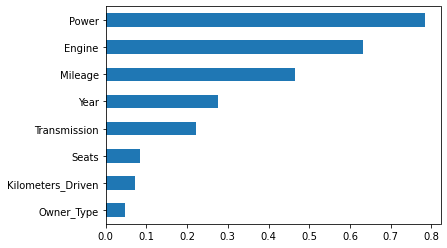

In [732]:
x = df.drop('Price',axis = 1)
y = df['Price']
array = mutual_info_regression(x,y)
s1 = pd.Series(array, index = x.columns)
s1.sort_values().plot(kind = 'barh')

### 3.Fisher Score

In [733]:
pip install skfeature-chappers


Note: you may need to restart the kernel to use updated packages.


In [734]:
from skfeature.function.similarity_based import fisher_score

In [735]:
array = fisher_score.fisher_score(x,y)

s1 = pd.Series(array, index = x.columns)
s1.sort_values().plot(kind = 'barh')

KeyboardInterrupt: 

### 4.variance threshold method

In [736]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0.8)
var_thresh.fit(df)
array = var_thresh.get_support()
array

array([ True,  True, False, False,  True,  True,  True, False,  True])

In [737]:
np.where(array== False)[0]

array([2, 3, 7], dtype=int64)

In [738]:
df.columns[np.where(array == False)[0]]

Index(['Transmission', 'Owner_Type', 'Seats'], dtype='object')

In [739]:
### we can delete ['Transmission', 'Owner_Type', 'Seats'] These three features

In [740]:
df.drop(df.columns[np.where(array == False)[0]],axis=1,inplace=True)

In [741]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
0,2010,72000,26.60,998,58.16,1.75
1,2015,41000,19.67,1582,126.20,12.50
2,2011,46000,18.20,1199,88.70,4.50
3,2012,87000,20.77,1248,88.76,6.00
4,2013,40670,15.20,1968,140.80,17.74


In [742]:
data=pd.concat([df,df_name],axis=1)
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 2.0 TDI Multitronic,Audi A4 35 TDI Premium,...,Volkswagen Polo Petrol Trendline 1.2L,Volkswagen Vento 1.5 TDI Highline,Volkswagen Vento 1.5 TDI Highline AT,Volkswagen Vento 1.6 Highline,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volkswagen Vento Diesel Trendline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT,other
0,2010,72000,26.60,998,58.16,1.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582,126.20,12.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199,88.70,4.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2012,87000,20.77,1248,88.76,6.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968,140.80,17.74,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [743]:
x=data.drop('Price',axis=1)
y=data['Price']

In [744]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Evaluation

### 1.Linear Regression

In [745]:
lgr=LinearRegression()
lgr.fit(x_train,y_train)

LinearRegression()

In [746]:
### Testing data evaluation
y_pred=lgr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE:',mae)
r2=r2_score(y_test,y_pred)
print('R2 score:',r2)

MSE: 47.543609842659905
MAE: 3.3915809143171116
R2 score: 0.6136534523975672


In [747]:
### Training data evaluation
y_pred=lgr.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE:',mae)
r2=r2_score(y_train,y_pred)
print('R2 score:',r2)

MSE: 33.50806538786808
MAE: 3.104229531921825
R2 score: 0.7333582574215883


# 2.Decision Tree

In [748]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [749]:
### Testing data evaluation
y_pred=dt.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE:',mae)
r2=r2_score(y_test,y_pred)
print('R2 score:',r2)

MSE: 25.594395950996677
MAE: 2.173218438538206
R2 score: 0.7920160764745996


In [750]:
### Training data evaluation
y_pred=dt.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE:',mae)
r2=r2_score(y_train,y_pred)
print('R2 score:',r2)

MSE: 0.009553772931810315
MAE: 0.005753547940463829
R2 score: 0.9999239754777469


### Hyperparameter Tunning

In [751]:
dt=DecisionTreeRegressor()
hyp={'max_depth':np.arange(1,15),
    'min_samples_split':np.arange(2,20),
    'min_samples_leaf':np.arange(1,15)}
rscv=RandomizedSearchCV(dt,hyp,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [752]:
rscv.best_estimator_

DecisionTreeRegressor(max_depth=14, min_samples_leaf=9, min_samples_split=7)

In [753]:
dt_model=rscv.best_estimator_
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=9, min_samples_split=7)

In [754]:
### Testing data evaluation
y_pred=dt_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE:',mae)
r2=r2_score(y_test,y_pred)
print('R2 score:',r2)

MSE: 22.57556851917619
MAE: 2.1424624778773147
R2 score: 0.8165475237069647


In [755]:
### Training data evaluation
y_pred=dt_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE:',mae)
r2=r2_score(y_train,y_pred)
print('R2 score:',r2)

MSE: 13.513518173853349
MAE: 1.6381955753048951
R2 score: 0.8924656499104872


# 3.Random Forest

In [756]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [757]:
### Testing data evaluation
y_pred=rf.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE:',mae)
r2=r2_score(y_test,y_pred)
print('R2 score:',r2)

MSE: 16.893923032646747
MAE: 1.7021594945420027
R2 score: 0.8627174322537909


In [758]:
### Training data evaluation
y_pred=rf.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE:',mae)
r2=r2_score(y_train,y_pred)
print('R2 score:',r2)

MSE: 2.243571437802204
MAE: 0.6193951463679969
R2 score: 0.9821466924201679


### Hyperparameter Tunning

In [759]:
rf=RandomForestRegressor()
hyp={'n_estimators':np.arange(10,200),
    'max_depth':np.arange(1,20),
    'min_samples_split':np.arange(2,20),
    'min_samples_leaf':np.arange(1,20)}
rfcv=RandomizedSearchCV(rf,hyp,cv=5)
rfcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 16

In [760]:
rfcv.best_estimator_

RandomForestRegressor(max_depth=11, min_samples_leaf=4, min_samples_split=11,
                      n_estimators=117)

In [761]:
rf_model=rfcv.best_estimator_
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=11, min_samples_leaf=4, min_samples_split=11,
                      n_estimators=117)

In [762]:
### Testing data evaluation
y_pred=rf_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE:',mae)
r2=r2_score(y_test,y_pred)
print('R2 score:',r2)

MSE: 17.64924110253496
MAE: 1.8717951761927303
R2 score: 0.8565796036453035


In [763]:
### Training data evaluation
y_pred=rf_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE:',mae)
r2=r2_score(y_train,y_pred)
print('R2 score:',r2)

MSE: 8.91037860397707
MAE: 1.3545787911130316
R2 score: 0.9290953133075224


In [764]:
rf_model=rfcv.best_estimator_
rf_model.fit(x_train,y_train)
pickle.dump(rf_model,open('model.pkl','wb'))

In [765]:
columns_dict={"columns":x_train.columns}
dict_cols=open('columns.pkl','wb')
pickle.dump(columns_dict,dict_cols)
dict_cols.close()